In [19]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import download_corpora
from textblob import TextBlob
import geopandas as gpd
from shapely.geometry import Point
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
def process_region(base_path):
    """
    Procesa todos los archivos JSON dentro de las subcarpetas de una región específica.
    
    Args:
    - base_path (str): Ruta de la carpeta que contiene las subcarpetas por región.
    
    Returns:
    - DataFrame: Un DataFrame con todos los datos combinados de la región.
    """
    all_data = []

    # Recorrer cada carpeta dentro de la ruta base (base_path)
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        
        if os.path.isdir(folder_path):
            print(f"Procesando carpeta: {folder}")
            
            # Recorrer cada archivo JSON dentro de la carpeta
            for json_file in os.listdir(folder_path):
                json_path = os.path.join(folder_path, json_file)
                
                # Leer el archivo JSON
                with open(json_path, 'r') as f:
                    try:
                        # Leer cada línea como un objeto JSON separado
                        for line in f:
                            try:
                                data = json.loads(line.strip())
                                all_data.append(data)
                            except json.JSONDecodeError as e:
                                print(f"Error decodificando JSON en {json_file}, línea ignorada: {e}")
                    
                    except Exception as e:
                        print(f"Error abriendo o leyendo el archivo {json_file}: {e}")

    # Convertir la lista de datos en un DataFrame de pandas
    return pd.DataFrame(all_data)

In [3]:
# Medio Oeste
df_medio_oeste = process_region('medio_oeste')

Procesando carpeta: review-Michigan
Procesando carpeta: review-Wisconsin
Procesando carpeta: review-North_Dakota
Procesando carpeta: review-Illinois
Procesando carpeta: review-Indiana
Procesando carpeta: review-Kansas
Procesando carpeta: review-Iowa
Procesando carpeta: review-Missouri
Procesando carpeta: review-Nebraska
Procesando carpeta: review-South_Dakota
Procesando carpeta: review-Ohio


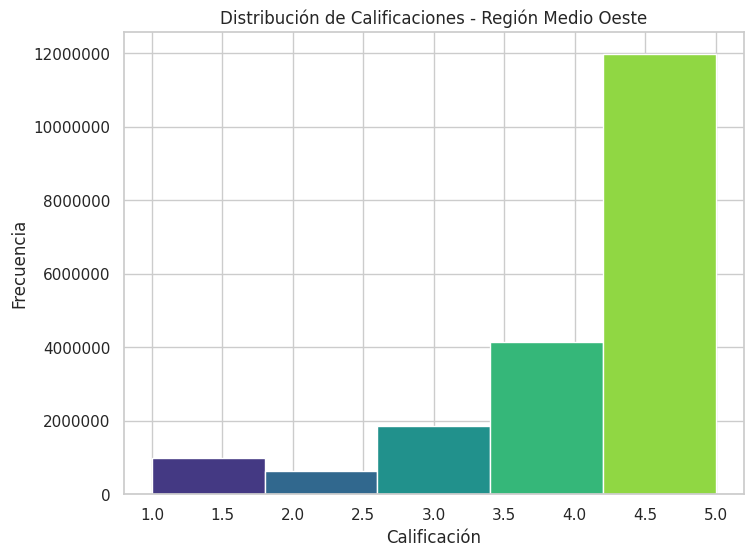

In [24]:
# Crear una paleta de colores utilizando Seaborn
colors = sns.color_palette("viridis", 5)

# Crear el histograma con Matplotlib y colorear cada barra
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(df_medio_oeste['rating'], bins=5, color=colors[0])

# Colorear las barras de acuerdo a la paleta
for i, patch in enumerate(patches):
    patch.set_facecolor(colors[i])

plt.title('Distribución de Calificaciones - Región Medio Oeste')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')

# Cambiar el formato del eje de las ordenadas para evitar notación exponencial
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [ ]:
df_medio_oeste.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,103014043257218513794,Amber Hunter,1554516056973,5,Love this place. They love the animals and are...,None,None,0x8817f29d2d0f4975:0x55472eb500cc5478
1,103945186998054296113,Ed Williams,1396291677820,5,Our old dog was on his last couple of uncomfor...,None,None,0x8817f29d2d0f4975:0x55472eb500cc5478
2,114986393063874906587,Kathy Dillon,1579128726920,5,The Doc is THE best!,None,None,0x8817f29d2d0f4975:0x55472eb500cc5478
3,100979446299145655136,Packy Cavinder,1595020921521,4,No handicap entrance,None,None,0x8817f29d2d0f4975:0x55472eb500cc5478
4,114598243004811190014,Tammy Ralosky,1531218485727,4,I haven't been there yet. But u know after Dic...,None,None,0x8817f29d2d0f4975:0x55472eb500cc5478


In [6]:
# Noreste
df_noreste = process_region('noreste')

Procesando carpeta: review-Maine
Procesando carpeta: review-Pennsylvania
Procesando carpeta: review-New_Hampshire
Procesando carpeta: review-Minnesota
Procesando carpeta: review-Rhode_Island
Procesando carpeta: review-New_Jersey
Procesando carpeta: review-Vermont
Procesando carpeta: review-Connecticut
Procesando carpeta: review-Massachusetts
Procesando carpeta: review-New_York


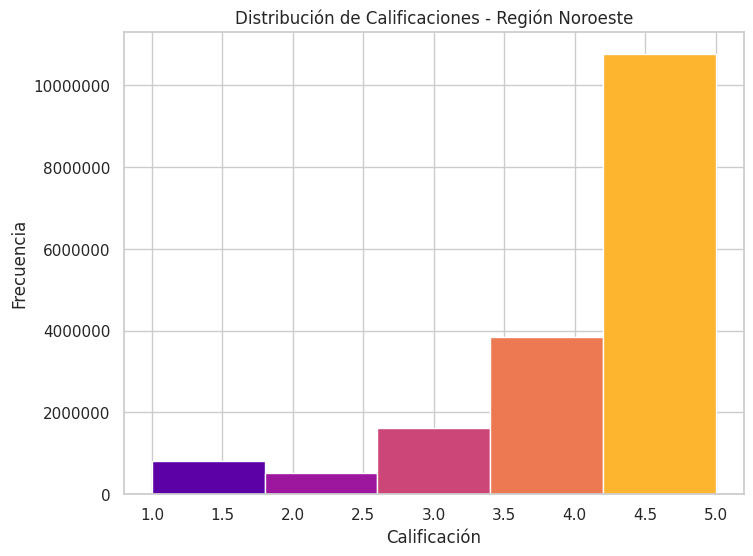

In [26]:
# Crear una paleta de colores utilizando Seaborn
colors = sns.color_palette("plasma", 5)

# Crear el histograma con Matplotlib y colorear cada barra
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(df_noreste['rating'], bins=5, color=colors[0])

# Colorear las barras de acuerdo a la paleta
for i, patch in enumerate(patches):
    patch.set_facecolor(colors[i])

plt.title('Distribución de Calificaciones - Región Noroeste')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')

# Cambiar el formato del eje de las ordenadas para evitar notación exponencial
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [7]:
df_noreste.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,113439885720143786522,Steve Holland,1528823744253,4,My friend and I played here today. played all ...,None,None,0x4cb27993a61ab3e1:0xa6c6508fe8842ff0
1,107421546746170771489,Matthew Hall,1500129522343,2,It literally pains me to give such a low revie...,None,None,0x4cb27993a61ab3e1:0xa6c6508fe8842ff0
2,103835206402034953214,Laura Oliver,1534025979137,1,DO NOT GO HERE!!! Seriously!! This was the mos...,None,None,0x4cb27993a61ab3e1:0xa6c6508fe8842ff0
3,113493171757583101688,Phil Rose,1495584198169,2,Not sure what happened but it's not what it us...,None,None,0x4cb27993a61ab3e1:0xa6c6508fe8842ff0
4,108990334175672695739,Sam I Am,1436912786006,4,Very nice course it's awesome that 27 holes al...,None,None,0x4cb27993a61ab3e1:0xa6c6508fe8842ff0


In [8]:
# Oeste
df_oeste = process_region('oeste')

Procesando carpeta: review-Colorado
Procesando carpeta: review-New_Mexico
Procesando carpeta: review-California
Procesando carpeta: review-Montana
Procesando carpeta: review-Wyoming
Procesando carpeta: review-Alaska
Procesando carpeta: review-Oregon
Procesando carpeta: review-Idaho
Procesando carpeta: review-Hawaii
Procesando carpeta: review-Arizona
Procesando carpeta: review-Nevada
Procesando carpeta: review-Washington
Procesando carpeta: review-Utah


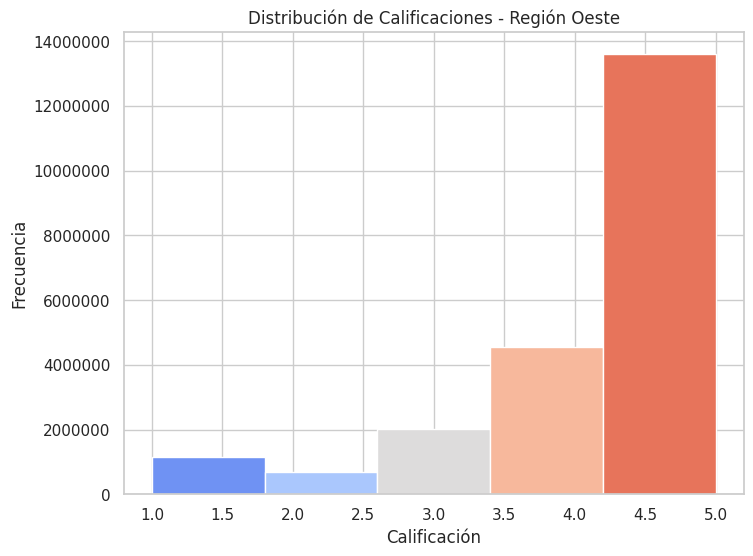

In [31]:
# Crear una paleta de colores utilizando Seaborn
colors = sns.color_palette("coolwarm", 5)

# Crear el histograma con Matplotlib y colorear cada barra
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(df_oeste['rating'], bins=5, color=colors[0])

# Colorear las barras de acuerdo a la paleta
for i, patch in enumerate(patches):
    patch.set_facecolor(colors[i])

plt.title('Distribución de Calificaciones - Región Oeste')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')

# Cambiar el formato del eje de las ordenadas para evitar notación exponencial
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [10]:
df_oeste.shape

(21981547, 8)

In [6]:
# Sur
df_sur = process_region('sur')

Procesando carpeta: review-Tennessee
Procesando carpeta: review-Arkansas
Procesando carpeta: review-Oklahoma
Procesando carpeta: review-Texas
Procesando carpeta: review-Kentucky
Procesando carpeta: review-Louisiana
Procesando carpeta: review-Mississippi
Procesando carpeta: review-Alabama


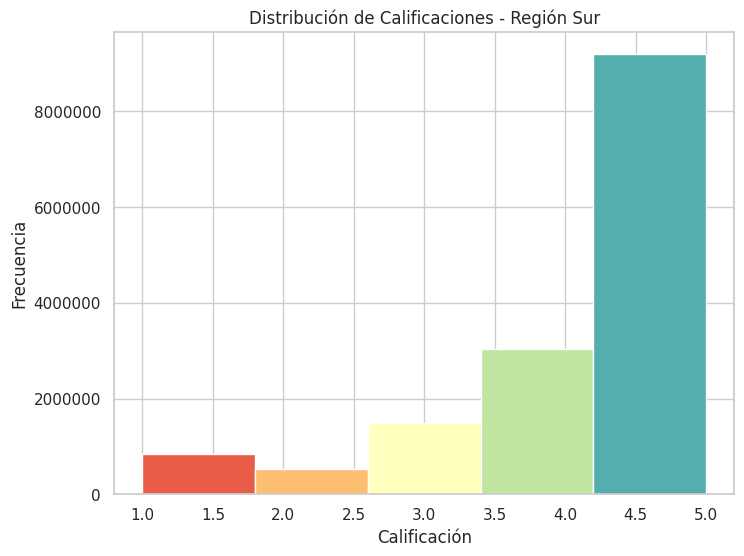

In [32]:
# Crear una paleta de colores utilizando Seaborn
colors = sns.color_palette("Spectral", 5)

# Crear el histograma con Matplotlib y colorear cada barra
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(df_sur['rating'], bins=5, color=colors[0])

# Colorear las barras de acuerdo a la paleta
for i, patch in enumerate(patches):
    patch.set_facecolor(colors[i])

plt.title('Distribución de Calificaciones - Región Sur')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')

# Cambiar el formato del eje de las ordenadas para evitar notación exponencial
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [12]:
df_sur.shape

(15068005, 8)

In [13]:
# Sur atlántico
df_sur_atl = process_region('sur_atlantico')

Procesando carpeta: review-South_Carolina
Procesando carpeta: review-District_of_Columbia
Procesando carpeta: review-Maryland
Procesando carpeta: review-North_Carolina
Procesando carpeta: review-Florida
Procesando carpeta: review-Delaware
Procesando carpeta: review-Virginia
Procesando carpeta: review-West_Virginia
Procesando carpeta: review-Georgia


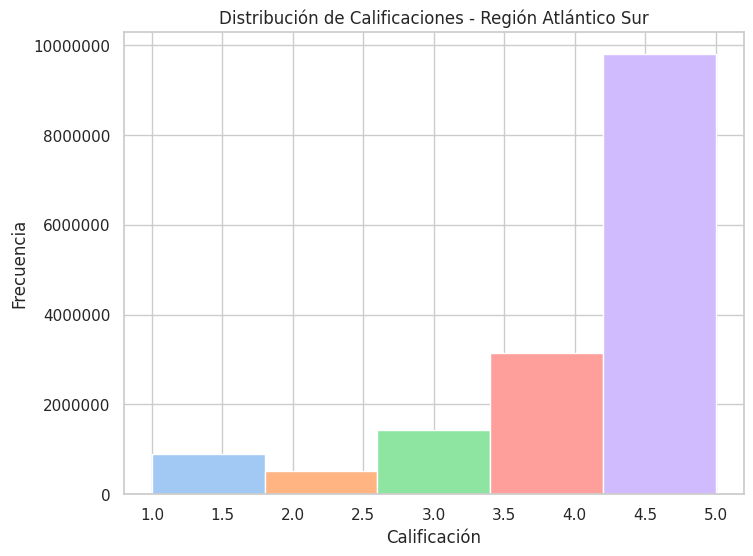

In [35]:
# Crear una paleta de colores utilizando Seaborn
colors = sns.color_palette("pastel", 5)

# Crear el histograma con Matplotlib y colorear cada barra
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(df_sur_atl['rating'], bins=5, color=colors[0])

# Colorear las barras de acuerdo a la paleta
for i, patch in enumerate(patches):
    patch.set_facecolor(colors[i])

plt.title('Distribución de Calificaciones - Región Atlántico Sur')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')

# Cambiar el formato del eje de las ordenadas para evitar notación exponencial
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [14]:
df_sur_atl.shape

(15762712, 8)

In [15]:
df_sur.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,118288383279870497662,Ally Medina,1567349037857,1,I have been taking my daughter here since 2015...,None,"{'time': 1567368090513, 'text': 'All of the pr...",0x88640cea7d985e0b:0xf214c6bf1d01be6c
1,113084676538676678822,Nikki Thomas,1476897445568,5,We switched from Dr.Henschel at Tennessee Pedi...,None,None,0x88640cea7d985e0b:0xf214c6bf1d01be6c
2,100686891229653117464,Michael Wahba,1574100089433,5,The doctors and nurses and all staff are reall...,None,None,0x88640cea7d985e0b:0xf214c6bf1d01be6c
3,100547995478573859128,DaiJa Ricks,1535731263264,5,My children have been patients at this office ...,None,None,0x88640cea7d985e0b:0xf214c6bf1d01be6c
4,105957410396834148372,Lydia Thompson,1554665980076,5,"Dr. Haselton is great, my boys have seen her f...",None,None,0x88640cea7d985e0b:0xf214c6bf1d01be6c


In [18]:
# Mostrar la cantidad de filas con valores nulos en la columna 'text'
cantidad_nulos = df_sur['text'].isnull().sum()
print(f"Cantidad de filas con valores nulos en la columna 'text': {cantidad_nulos}")

# Eliminar filas donde 'text' es None o NaN
df_sur_clean = df_sur.dropna(subset=['text'])


In [40]:
# Mostrar la cantidad de filas con valores nulos en la columna 'text'
cantidad_nulos = df_sur['text'].isnull().sum()
print(f"Cantidad de filas con valores nulos en la columna 'text': {cantidad_nulos}")

Cantidad de filas con valores nulos en la columna 'text': 6764226


In [8]:
# Eliminar filas donde 'text' es None o NaN
df_sur_clean = df_sur.dropna(subset=['text'])


In [10]:
# Crear una matriz de frecuencia de términos
vectorizer = CountVectorizer(stop_words='english', max_features=20)


In [11]:
X = vectorizer.fit_transform(df_sur_clean['text'])


In [12]:
# Convertir la matriz a un DataFrame
df_keywords = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [13]:
# Agregar la columna de calificación
df_keywords['rating'] = df_sur_clean['rating']


In [14]:
# Sumar frecuencias por calificación
keywords_por_rating = df_keywords.groupby('rating').sum().T

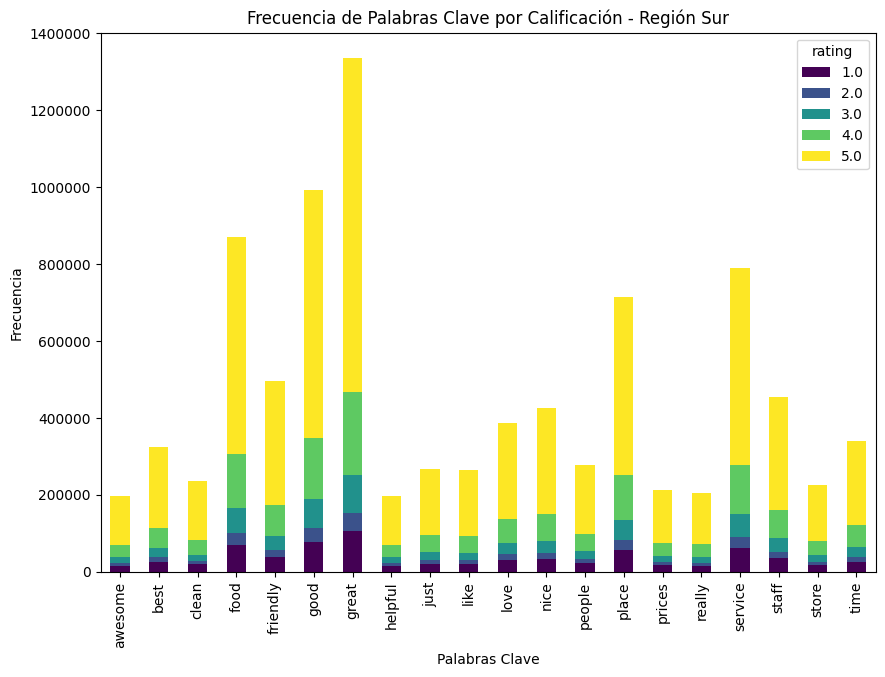

In [15]:
# Graficar las frecuencias de palabras clave por calificación
keywords_por_rating.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='viridis')
plt.title('Frecuencia de Palabras Clave por Calificación - Región Sur')
plt.xlabel('Palabras Clave')
plt.ylabel('Frecuencia')

# Cambiar el formato del eje de las ordenadas para evitar notación exponencial
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [23]:
# Filtrar reseñas que mencionan palabras relacionadas con comida en inglés
palabras_clave = ['food', 'restaurant', 'dish', 'meal', 'dinner', 'lunch', 'breakfast', 'eat', 'cuisine', 'menu', 'taste', 'delicious', 'flavor', 'snack']

# Filtrar el DataFrame
df_comida = df_sur_clean[df_sur_clean['text'].str.contains('|'.join(palabras_clave), case=False, na=False)]

In [24]:
# Calcular el sentimiento de cada reseña
df_comida['sentiment'] = df_comida['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

/tmp/ipykernel_50891/2738246625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comida['sentiment'] = df_comida['text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [25]:
# Clasificar los sentimientos
df_comida['sentiment_label'] = pd.cut(df_comida['sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['Negativo', 'Neutro', 'Positivo'])

/tmp/ipykernel_50891/4160819228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comida['sentiment_label'] = pd.cut(df_comida['sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['Negativo', 'Neutro', 'Positivo'])


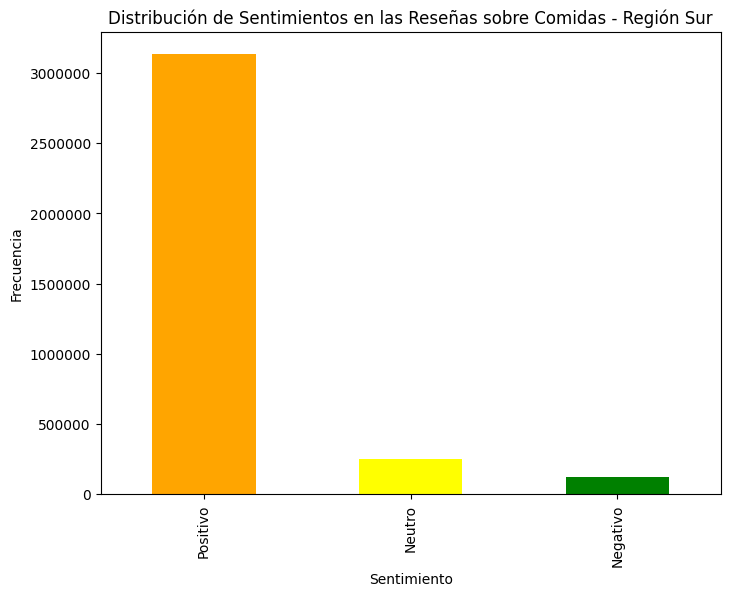

In [30]:
# Gráfico de barras de sentimientos
plt.figure(figsize=(8, 6))
df_comida['sentiment_label'].value_counts().plot(kind='bar', color=['orange', 'yellow', 'green'])
plt.title('Distribución de Sentimientos en las Reseñas sobre Comidas - Región Sur')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')


# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')

plt.grid(False)
plt.show()

### ```Trabajamos con los archivos de la carpeta metadata```

In [1]:
# Definir la ruta a la carpeta que contiene los archivos JSON
folder_path = 'metadata'

In [8]:
def process_met(base_path):
    """
    Procesa todos los archivos JSON dentro de la carpeta review-california (subcarpeta oeste).
    
    Args:
    - base_path (str): Ruta de la carpeta que contiene los archivos JSON de la región oeste/review-california.
    
    Returns:
    - DataFrame: Un DataFrame con todos los datos combinados de la carpeta review-california.
    """
    all_data = []

    # Recorrer cada archivo dentro de la carpeta base (review-california)
    for json_file in os.listdir(base_path):
        json_path = os.path.join(base_path, json_file)
        
        if os.path.isfile(json_path) and json_file.endswith('.json'):
            print(f"Procesando archivo: {json_file}")
            
            # Leer el archivo JSON
            with open(json_path, 'r') as f:
                try:
                    # Leer cada línea como un objeto JSON separado (en caso de que esté en formato de múltiples líneas)
                    for line in f:
                        try:
                            data = json.loads(line.strip())
                            all_data.append(data)
                        except json.JSONDecodeError as e:
                            print(f"Error decodificando JSON en {json_file}, línea ignorada: {e}")
                
                except Exception as e:
                    print(f"Error abriendo o leyendo el archivo {json_file}: {e}")

    # Convertir la lista de datos en un DataFrame de pandas
    return pd.DataFrame(all_data)

In [9]:
dfmeta = process_met('metadata')

Procesando archivo: 1.json
Procesando archivo: 3.json
Procesando archivo: 11.json
Procesando archivo: 7.json
Procesando archivo: 10.json
Procesando archivo: 8.json
Procesando archivo: 2.json
Procesando archivo: 9.json
Procesando archivo: 5.json
Procesando archivo: 4.json
Procesando archivo: 6.json


In [10]:
dfmeta.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


In [13]:
dfmeta.shape

(3025011, 15)

In [14]:
# Definir los límites de latitud y longitud
lat_min, lat_max = 34.0, 34.6
long_min_1, long_max_1 =  -120.0, -119.0


# Filtrar el DataFrame por los rangos de latitud y longitud
df_california_google = dfmeta[
    (dfmeta['latitude'] >= lat_min) & (dfmeta['latitude'] <= lat_max) &
    (dfmeta['longitude'] >= long_min_1) & (dfmeta['longitude'] <= long_max_1)]

In [15]:
df_california_google.shape

(6048, 15)

In [16]:
# Descargar el DataFrame de los negocios de california como un archivo CSV
df_california_google.to_csv('dfcalifornia_google.csv', index=False)

In [20]:
df_california_google.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
1226,Cos Bar Montecito,"Cos Bar Montecito, 1253 Coast Village Rd, Sant...",0x80e91236274ac2cf:0xbcad468a24816251,None,34.420889,-119.642298,"[Cosmetics store, Beauty supply store, Perfume...",4.4,5,None,"[[Thursday, 10AM–5PM], [Friday, 10AM–5PM], [Sa...","{'Service options': ['In-store shopping', 'Del...",Closed ⋅ Opens 10AM,"[0x80e91479459a3b5d:0xdaeadb519f2da2c0, 0x80e9...",https://www.google.com/maps/place//data=!4m2!3...
1232,Camino Real Apartments,"Camino Real Apartments, 4530 Carpinteria Ave, ...",0x80e90ec4c061634d:0x4bbfa4bb9f609c97,None,34.402176,-119.526903,[Apartment building],5.0,1,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x80e90ec4d019af55:0x161a93ce2c8f4368, 0x80e9...",https://www.google.com/maps/place//data=!4m2!3...
1993,Dove Community Center,"Dove Community Center, 3875 Telegraph Rd, Vent...",0x80e9ad5ac415d247:0xb97cce6c94bd3faa,None,34.274075,-119.242692,[Business center],4.0,1,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,None,https://www.google.com/maps/place//data=!4m2!3...
1994,Target Grocery,"Target Grocery, 245 S Mills Rd, Ventura, CA 93003",0x80e9ad6563c16173:0x8efb39e1c7e50407,None,34.269982,-119.249044,"[Grocery store, Supermarket]",4.5,2,None,"[[Thursday, 8AM–10PM], [Friday, 8AM–10PM], [Sa...","{'Service options': ['In-store pickup', 'In-st...",Closed ⋅ Opens 8AM,None,https://www.google.com/maps/place//data=!4m2!3...
3572,Aligned Pilates Studio,"Aligned Pilates Studio, 1516 Chapala St, Santa...",0x80e91488588fccdb:0xc09dec0de53a966f,None,34.425593,-119.709803,[Gym],5.0,4,None,None,None,None,"[0x80e914dea473abdd:0x9e37dce105d309b4, 0x80e9...",https://www.google.com/maps/place//data=!4m2!3...


/tmp/ipykernel_4776/427616469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_california_google['category'] = df_california_google['category'].apply(lambda x: eval(x) if isinstance(x, str) else x)
/tmp/ipykernel_4776/427616469.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_california_google['main_category'] = df_california_google['category'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown')


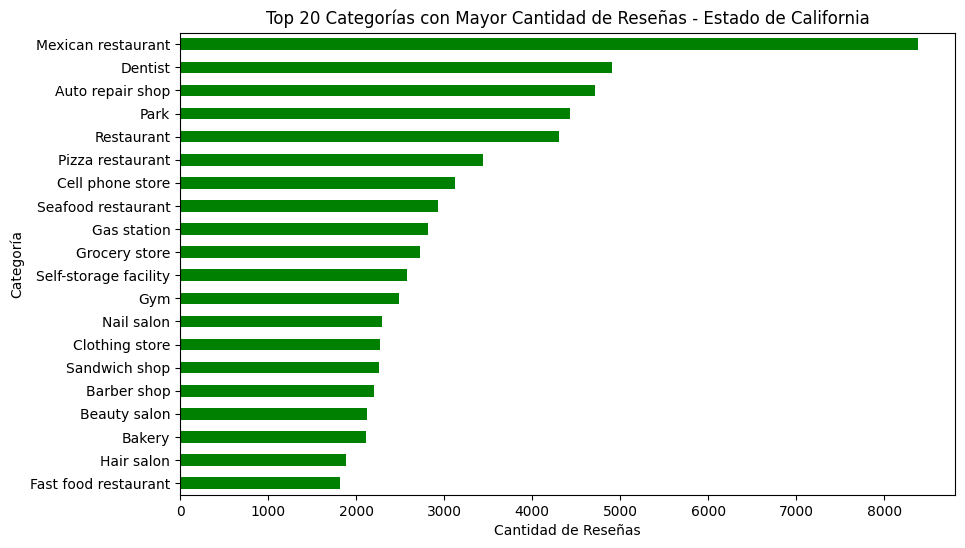

In [28]:
df_california_google['category'] = df_california_google['category'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Extraer la primera categoría de cada lista en 'category'
df_california_google['main_category'] = df_california_google['category'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown')

# Agrupar por categoría principal y contar el número de reseñas
category_review_counts = df_california_google.groupby('main_category')['num_of_reviews'].sum().sort_values(ascending=False)

# Seleccionar las 20 primeras categorías con mayor número de reseñas
top_20_categories = category_review_counts.head(20)

# Graficar las 20 primeras categorías
plt.figure(figsize=(10, 6))
top_20_categories.plot(kind='barh', color='green')

plt.title('Top 20 Categorías con Mayor Cantidad de Reseñas - Estado de California')
plt.xlabel('Cantidad de Reseñas')
plt.ylabel('Categoría')
plt.gca().invert_yaxis()  # Invertir el eje y para que la categoría con más reseñas esté en la parte superior
# Guardar la imagen antes de mostrarla
plt.savefig('cat_reseñas_google_calif.png', dpi=300, bbox_inches='tight')
# Mostrar la gráfica
plt.show()